# Calculating Polyspectra from the system's Liouvillian

After defining a system (e.g. a single quantum dot measured by a quantum point contact) we can 
directly calculate the corresponding polyspectra from the system Liouvillian.
The resulting spectra will be equivalent to the ones calculated 
from the integration of the stochastic master equation.

In [1]:
import quantumcatch as qc
from qutip import *
import numpy as np

Failed to import torch!


In [2]:

# ------ Operators and Hamiltonian -----
dot_levels = 2
a = destroy(dot_levels)
n = a.dag() * a
rho_0 = ket2dm(basis(dot_levels, 0)) + ket2dm(basis(dot_levels, 1)) 
rho_0 /= np.trace(rho_0)
H = 0 * n

# ------ System Parameters ------
beta = 5
gamma_out = 0.3
gamma_in = 0.5

c_measure_strength = {
    'a': gamma_out**0.5,
    'a_d': gamma_in**0.5,
}

sc_measure_strength = {
    'n': beta
}

c_ops = {
    'a': a,
    'a_d': a.dag(),
}

sc_ops =  {
    'n': n,
}

e_ops = {
    'n': n,
}

system = qc.System(H, rho_0, c_ops, sc_ops, e_ops, c_measure_strength, sc_measure_strength)

Now we only have to define the measurement operator and the 
frequencies at which the polyspectra should by calculated:

## Calculation of the Quantum Polypsectra

In [9]:
f_start = 0
f_stop = 2
n_points = 200
fs = np.linspace(f_start, f_stop, n_points)

measure_op = 'n'

spec = system.calculate_spectrum(fs, order_in=[1,2,3,4], measure_op=measure_op)

Calculating first order
Calculating power spectrum


  0%|          | 0/200 [00:00<?, ?it/s]

Calculating bispectrum


  0%|          | 0/200 [00:00<?, ?it/s]

Calculating correlation spectrum


  0%|          | 0/200 [00:00<?, ?it/s]

s1: (15.625+0j)


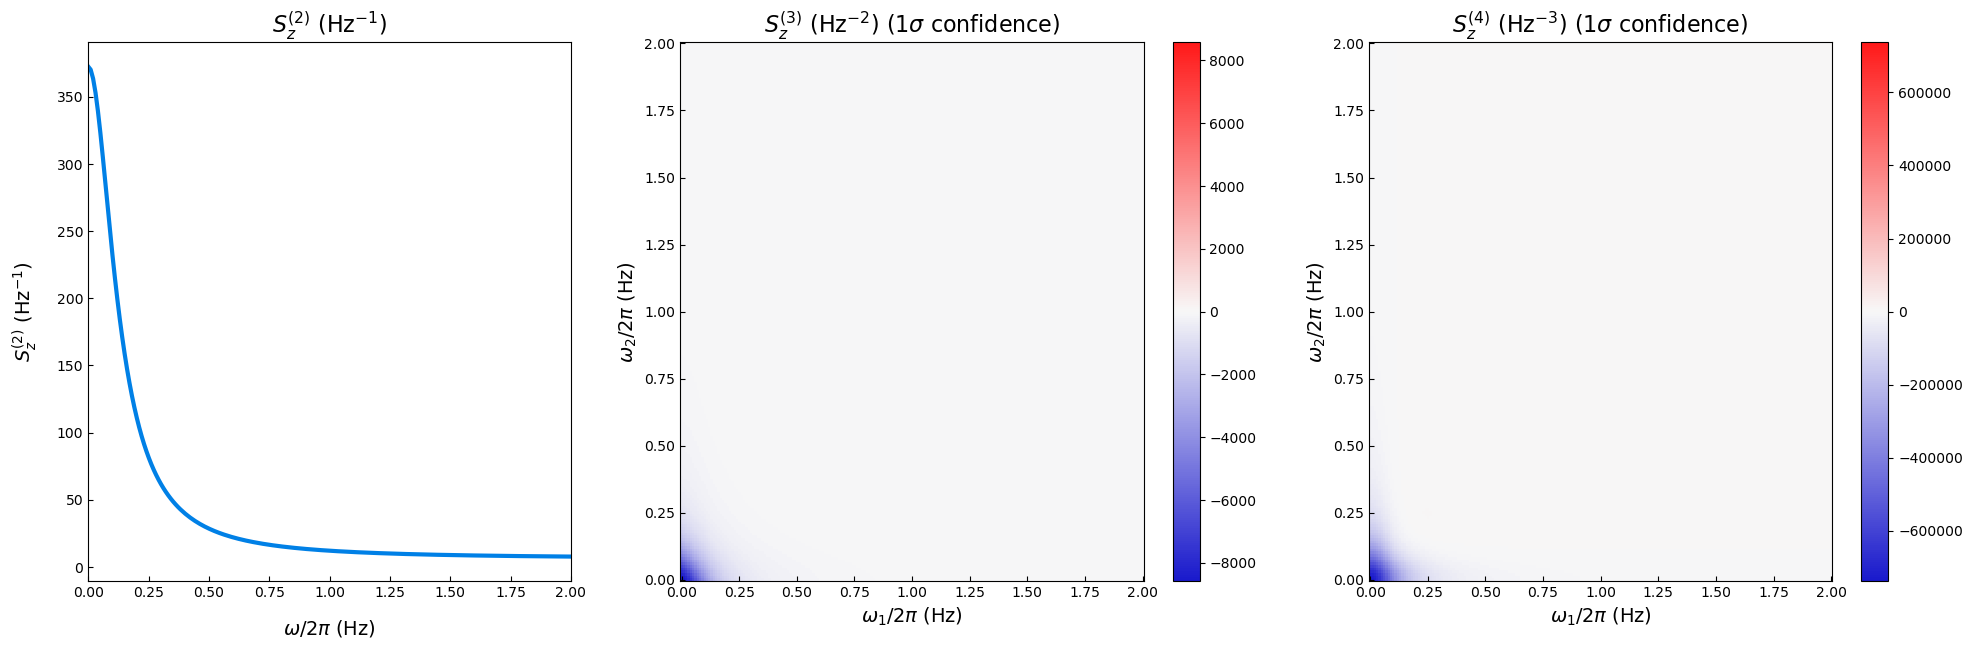

In [11]:
fig = system.plot()